In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import matplotlib
import pandas_profiling


In [2]:
import os
print(os.getcwd())

C:\Users\kbj80\AppData\Local\Temp\1aebc9e8-e346-4a67-9c79-865643a0a6a0


In [3]:
df = pd.read_excel("D:\Project\Django\Scripts\server_project\\test\owner_project\data\data2018.xlsx")
df.head(5)

,회원번호,성명,주민번호,주소,상태,가입상품,가입일자,최종불입일자,총납입회차,최종불입회차,...,실입금액,기간입금액,기간할인액,잔여금액,조합예수잔액,납입방법,담당자,부서,연체횟수,성별
0,0022A00001,이옥성,590318-1000000,경기도 광주시 퇴촌면 천진암로 530,해약,부금2400000,2008-09-08,2016-12-20,100,100,...,456000,2400000,0,-1944000,0,CMS,더피플라이프,관리부,0,남
1,0072A00001,안성열,581125-1000000,경기도 수원시 팔달구 월드컵로321번길 12-6,행사,특240만원,2007-09-28,2012-10-04,100,100,...,2400000,2400000,0,0,0,CMS,더피플라이프,관리부,0,남
2,0072A00002,배준택,831121-1000000,부산광역시 영도구 와치로 261 신흥동백 8차 다동 507호,보류,특240만원,2007-10-23,2013-05-20,100,68,...,1632000,1632000,0,768000,768000,CMS,더피플라이프,관리부,32,남
3,0072A00003,배민규,821023-1000000,울산광역시 중구 도화골10길 5,행사,특240만원,2007-10-23,2014-12-31,100,100,...,2400000,2400000,0,0,0,CMS,더피플라이프,관리부,0,남
4,0072A00006,최금순,340728-2000000,경기도 과천시 별양로 180 주공8단지 809동 1508호,행사,특240만원,2007-10-31,2016-01-05,100,100,...,2400000,2400000,0,0,0,CMS,더피플라이프,관리부,0,여


(206852,)

In [5]:
df = df[['회원번호','성명','주민번호','주소','상태','가입일자','최종불입일자','총납입회차','최종불입회차','상품금액','총불입액','해약금액','실입금액','기간입금액','기간할인액','잔여금액','조합예수잔액','담당자','부서','연체횟수','성별']]
df2 = df[['회원번호','성명','주민번호','주소','상태','가입일자','최종불입일자','총납입회차','최종불입회차','상품금액','총불입액','해약금액','실입금액','기간입금액','기간할인액','잔여금액','조합예수잔액','담당자','부서','연체횟수','성별']]


In [6]:
def export_adress(adress):
    result = adress[0:2]
    return result

def export_age(idnum):
    age = 120 - (int(idnum[0:2]))
    return age

def transform_status(current_status, flag):
    if current_status == '가입':
        if flag == 0:
            return '만기'
        else:
            return current_status

    elif current_status == '해약':
        if flag == 0:
            return '만기_해약'
        else:
            return current_status

    elif current_status == '미계좌':
        return '해약'

    elif current_status == '보류':
        return '가입'

    elif current_status == '접수':
        return '가입'

    else:
        return current_status
    
def export_price(price):
    if price < 1000000: # 100만원 미만
        return int(0)
    elif price < 2000000: # 200만원 미만
        return 1
    elif price < 3000000:
        return 2
    elif price < 4000000:
        return 3
    elif price < 5000000:
        return 4
    elif price < 6000000:
        return 5
    elif price < 7000000:
        return 6
    elif price < 8000000:
        return 7
    else:
        return 8
print(export_price(1000000))    

def transform_id(name, id_num):
    idnum = id_num[0:6]
    return name + idnum

# 연체횟수가 마이너스 인 값 처리
def preprocess_event(num):
    if num < 0:
        return -1
    else:
        return num
    
# 진행률 = 총 납입회차 - 최종불입회차
def process_rate(total, last):
    rate = int(last) / int(total)
    return rate

1


In [7]:
df = df.dropna(how='any')
df.shape

(215094, 21)

,회원번호,성명,주민번호,주소,상태,가입일자,최종불입일자,총납입회차,최종불입회차,상품금액,...,해약금액,실입금액,기간입금액,기간할인액,잔여금액,조합예수잔액,담당자,부서,연체횟수,성별
0,0022A00001,이옥성,590318-1000000,경기도 광주시 퇴촌면 천진암로 530,해약,2008-09-08,2016-12-20,100,100,2400000,...,1944000,456000,2400000,0,-1944000,0,더피플라이프,관리부,0,남
1,0072A00001,안성열,581125-1000000,경기도 수원시 팔달구 월드컵로321번길 12-6,행사,2007-09-28,2012-10-04,100,100,2400000,...,0,2400000,2400000,0,0,0,더피플라이프,관리부,0,남
2,0072A00002,배준택,831121-1000000,부산광역시 영도구 와치로 261 신흥동백 8차 다동 507호,보류,2007-10-23,2013-05-20,100,68,2400000,...,0,1632000,1632000,0,768000,768000,더피플라이프,관리부,32,남
3,0072A00003,배민규,821023-1000000,울산광역시 중구 도화골10길 5,행사,2007-10-23,2014-12-31,100,100,2400000,...,0,2400000,2400000,0,0,0,더피플라이프,관리부,0,남
4,0072A00006,최금순,340728-2000000,경기도 과천시 별양로 180 주공8단지 809동 1508호,행사,2007-10-31,2016-01-05,100,100,2400000,...,0,2400000,2400000,0,0,0,더피플라이프,관리부,0,여
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234607,U022A22155,조길찬,761012-1000000,부산 금정구 장전2동 만세한신아파트 101-1802호,해약,2009-01-07,2009-04-27,100,3,2400000,...,0,72000,72000,0,2328000,2328000,더피플라이프,관리부,97,남
234609,U244A00803,배상호,820807-1000000,부산 영도구 동삼동 도개공아파트 1310-205호,해약,2008-12-16,2012-06-29,60,43,2400000,...,1240000,480000,1720000,0,-560000,680000,더피플라이프,관리부,17,남
234610,U244A00804,배규태,830402-1000000,부산 사하구 구평동 104-2번지,만기,2008-12-16,2013-11-25,60,60,2400000,...,0,2400000,2400000,0,0,0,더피플라이프,관리부,0,남
234611,U244A00805,김군자,490809-2000000,부산 서구 서대신동2가 250-3번지 남원옥,해약,2008-12-16,2008-12-18,60,1,2400000,...,0,40000,40000,0,2360000,2360000,더피플라이프,관리부,59,여


In [10]:
# 1차 전처리
df['주소'] = df['주소'].apply(lambda x : export_adress(x))
df['나이'] = df['주민번호'].apply(lambda x : export_age(x))
df['상태'] = df.apply(lambda x: transform_status(x['상태'], x['총납입회차'] - x['최종불입회차']), axis=1)
df['상품금액']= df['상품금액'].apply(lambda x : export_price(x))
df['회원이름'] = df.apply(lambda x: transform_id(x['성명'], x['주민번호']), axis=1)
df['연체횟수'] = df['연체횟수'].apply(lambda x : preprocess_event(x))
dfs['진행률'] = dfs.apply(lambda x: process_rate(x['총납입회차'] , x['최종불입회차']), axis=1)


In [11]:
dfs=df[['회원번호','회원이름','주소','상태','가입일자','최종불입일자','총납입회차','최종불입회차','상품금액','총불입액','해약금액','담당자','부서','연체횟수','성별','나이']]

In [19]:
#해약금액 0 인 row 제거
def preprocess_cancle_price(price):
    if price == 0:
        return None
    else:
        return price
    
dfs['해약금액'] = df['해약금액'].apply(lambda x : preprocess_cancle_price(x))

In [21]:
df2 = dfs.dropna(how='any')
df2.shape

(38957, 16)

In [23]:
df2.to_csv("D:\Project\Django\Scripts\server_project\\test\owner_project\해약_2018.csv", index=False)

In [25]:
pr2 = df2.profile_report()
pr2.to_file("해약_report_2018.html")

build report structure: 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]


In [13]:
# MIN MAX 정규화
def z_score_normalize(value, mean, std):
    normalized = []
    normalized_num = (value - mean) / std
    normalized.append(normalized_num)
    
    return normalized[0]

def min_max_normalize(value, min_list, max_list):
    normalized = []
    normalized_num = (value - min_list) / (max_list - min_list)
    normalized.append(normalized_num)
    
    return normalized[0]

In [14]:
min_list = min(list(dfs['해약금액']))
max_list = max(list(dfs['해약금액']))
dfs['해약금액'] = dfs['해약금액'].apply(lambda x : min_max_normalize(x,min_list,max_list))

In [15]:
min_list = min(list(dfs['연체횟수']))
max_list = max(list(dfs['연체횟수']))
dfs['연체횟수'] = dfs['연체횟수'].apply(lambda x : min_max_normalize(x,min_list,max_list))

In [16]:
min_list = min(list(dfs['나이']))
max_list = max(list(dfs['나이']))
dfs['나이'] = dfs['나이'].apply(lambda x : min_max_normalize(x,min_list,max_list))

In [17]:
min_list = min(list(dfs['총불입액']))
max_list = max(list(dfs['총불입액']))
dfs['총불입액'] = dfs['총불입액'].apply(lambda x : min_max_normalize(x,min_list,max_list))

In [12]:
dfs['상품금액'] = df2['상품금액']
dfs

,회원번호,회원이름,주소,상태,가입일자,최종불입일자,총납입회차,최종불입회차,상품금액,총불입액,해약금액,담당자,부서,연체횟수,성별,나이
0,0022A00001,이옥성590318,경기,만기_해약,2008-09-08,2016-12-20,100,100,2400000,2400000,1944000,더피플라이프,관리부,0,남,61
1,0072A00001,안성열581125,경기,행사,2007-09-28,2012-10-04,100,100,2400000,2400000,0,더피플라이프,관리부,0,남,62
2,0072A00002,배준택831121,부산,가입,2007-10-23,2013-05-20,100,68,2400000,1632000,0,더피플라이프,관리부,32,남,37
3,0072A00003,배민규821023,울산,행사,2007-10-23,2014-12-31,100,100,2400000,2400000,0,더피플라이프,관리부,0,남,38
4,0072A00006,최금순340728,경기,행사,2007-10-31,2016-01-05,100,100,2400000,2400000,0,더피플라이프,관리부,0,여,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234607,U022A22155,조길찬761012,부산,해약,2009-01-07,2009-04-27,100,3,2400000,72000,0,더피플라이프,관리부,97,남,44
234609,U244A00803,배상호820807,부산,해약,2008-12-16,2012-06-29,60,43,2400000,1720000,1240000,더피플라이프,관리부,17,남,38
234610,U244A00804,배규태830402,부산,만기,2008-12-16,2013-11-25,60,60,2400000,2400000,0,더피플라이프,관리부,0,남,37
234611,U244A00805,김군자490809,부산,해약,2008-12-16,2008-12-18,60,1,2400000,40000,0,더피플라이프,관리부,59,여,71


In [18]:
min_list = min(list(dfs['상품금액']))
max_list = max(list(dfs['상품금액']))
dfs['상품금액'] = dfs['상품금액'].apply(lambda x : min_max_normalize(x,min_list,max_list))

In [19]:
def process_rate(total, last):
    rate = int(last) / int(total)
    return rate


In [20]:
dfs['진행률'] = dfs.apply(lambda x: process_rate(x['총납입회차'] , x['최종불입회차']), axis=1)


In [21]:
dfs=dfs[['회원번호','회원이름','주소','상태','상품금액','총불입액','해약금액','담당자','연체횟수','성별','나이','진행률']]
dfs

,회원번호,회원이름,주소,상태,상품금액,총불입액,해약금액,담당자,연체횟수,성별,나이,진행률
0,0022A00001,이옥성590318,경기,만기_해약,0.208283,0.491725,0.501548,더피플라이프,0.008333,남,0.404040,1.000000
1,0072A00001,안성열581125,경기,행사,0.208283,0.491725,0.000000,더피플라이프,0.008333,남,0.414141,1.000000
2,0072A00002,배준택831121,부산,가입,0.208283,0.334324,0.000000,더피플라이프,0.275000,남,0.161616,0.680000
3,0072A00003,배민규821023,울산,행사,0.208283,0.491725,0.000000,더피플라이프,0.008333,남,0.171717,1.000000
4,0072A00006,최금순340728,경기,행사,0.208283,0.491725,0.000000,더피플라이프,0.008333,여,0.656566,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
234607,U022A22155,조길찬761012,부산,해약,0.208283,0.014603,0.000000,더피플라이프,0.816667,남,0.232323,0.030000
234609,U244A00803,배상호820807,부산,해약,0.208283,0.352359,0.319917,더피플라이프,0.150000,남,0.171717,0.716667
234610,U244A00804,배규태830402,부산,만기,0.208283,0.491725,0.000000,더피플라이프,0.008333,남,0.161616,1.000000
234611,U244A00805,김군자490809,부산,해약,0.208283,0.008044,0.000000,더피플라이프,0.500000,여,0.505051,0.016667


In [22]:
def preprocess_sex(sex):
    if sex =='남':
        return 0
    else:
        return 1

In [23]:
dfs['성별'] = dfs['성별'].apply(lambda x : preprocess_sex(x))

In [24]:
def labeling(status):
    if status == '만기_해약':
        return 0
    elif status == '해약':
        return 1
    elif status == '행사':
        return 2
    elif status == '가입':
        return 3
    else: # 만기
        return 4

In [25]:
dfs['상태'] = dfs['상태'].apply(lambda x : labeling(x))

In [26]:
dfs=dfs[['회원번호','회원이름','주소','상품금액','총불입액','해약금액','담당자','연체횟수','성별','나이','진행률','상태']]
dfs

,회원번호,회원이름,주소,상품금액,총불입액,해약금액,담당자,연체횟수,성별,나이,진행률,상태
0,0022A00001,이옥성590318,경기,0.208283,0.491725,0.501548,더피플라이프,0.008333,0,0.404040,1.000000,0
1,0072A00001,안성열581125,경기,0.208283,0.491725,0.000000,더피플라이프,0.008333,0,0.414141,1.000000,2
2,0072A00002,배준택831121,부산,0.208283,0.334324,0.000000,더피플라이프,0.275000,0,0.161616,0.680000,3
3,0072A00003,배민규821023,울산,0.208283,0.491725,0.000000,더피플라이프,0.008333,0,0.171717,1.000000,2
4,0072A00006,최금순340728,경기,0.208283,0.491725,0.000000,더피플라이프,0.008333,1,0.656566,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
234607,U022A22155,조길찬761012,부산,0.208283,0.014603,0.000000,더피플라이프,0.816667,0,0.232323,0.030000,1
234609,U244A00803,배상호820807,부산,0.208283,0.352359,0.319917,더피플라이프,0.150000,0,0.171717,0.716667,1
234610,U244A00804,배규태830402,부산,0.208283,0.491725,0.000000,더피플라이프,0.008333,0,0.161616,1.000000,4
234611,U244A00805,김군자490809,부산,0.208283,0.008044,0.000000,더피플라이프,0.500000,1,0.505051,0.016667,1


In [27]:
pr = dfs.profile_report()
pr.to_file("normalized_MINMAX_report.html")

build report structure: 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]


In [28]:
dfs.to_csv('normalization_minmax.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C1A000248>,
      dtype=object)

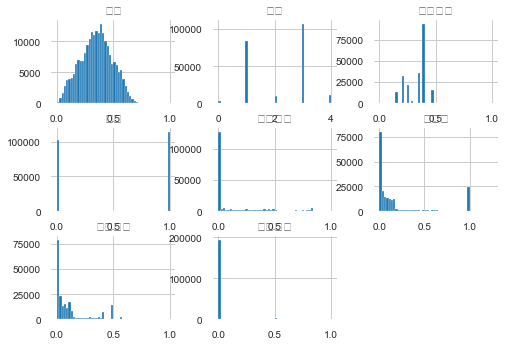

In [31]:
dfs.hist(bins=50)